<p style="font-family: Arial; font-size:3.75vw;color:purple; font-style:bold"><br>
pandas Exercise Notebook Solutions
</p><br>

# Exercise Notebook Instructions

### 1. Important: Only modify the cells which instruct you to modify them - leave "do not modify" cells alone.  

The code which tests your responses assumes you have run the startup/read-only code exactly.

### 2. Work through the notebook in order.

Some of the steps depend on previous, so you'll want to move through the notebook in order.

### 3. It is okay to use libraries.

You may find some questions are fairly straightforward to answer using built-in library functions.  That's totally okay - part of the point of these exercises is to familiarize you with the commonly used functions.

### 4. Seek help if stuck

If you get stuck, don't worry!  You can either review the videos/notebooks from this week, ask in the course forums, or look to the solutions for the correct answer.  BUT, be careful about looking to the solutions too quickly.  Struggling to get the right answer is an important part of the learning process.

In [1]:
import pandas as pd
import numpy as np
import os.path

In this exercise notebook you will have the opportunity to load the MovieLens database and perform additional analysis.

First let's load the data into a Pandas Dataframe:

In [2]:
# DO NOT MODIFY

# set here the relative path to the movielens folder
MOVIELENS="C:/Users/Tole 01/Desktop/Micromaster_Data_Science/Week-4-Pandas/movielens/ml-25m"

movies = pd.read_csv(os.path.join(MOVIELENS, 'movies.csv'), sep=',')
ratings = pd.read_csv(os.path.join(MOVIELENS, 'ratings.csv'), sep=',')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [5]:
ratings[ratings.movieId == 1].rating.mean()

3.893707794587238

In [6]:
ratings[ratings['movieId']==1]['rating'].mean()

3.893707794587238

In [7]:
import string 

years = [] #list of years as ints
error = 0

for e in range(len(movies.title)):
    try:
        years.append(int(movies.title[e].split()[-1].strip("()" + string.ascii_letters)))
    except:
        years.append(0)
        error += 1
        
print("Error percentage: " + str(round(error/len(movies.title) * 100, 3)) + " %")
movies["year"] = years

movies.head()

Error percentage: 0.641 %


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


## Exercise 1: Find the Minimum Rating

Let's start by computing the minimum rating.

In the next cell, define the `min_rating` variable to be the minimum rating across all of the DataFrame:

In [8]:
min_rating = None
### BEGIN SOLUTION
min_rating = ratings.rating.min()
print(min_rating)
### END SOLUTION

0.5


In [9]:
# DO NOT MODIFY

assert isinstance(min_rating, float), "Try again, make sure you are taking the min of just 1 column"
assert abs(min_rating - 0.5) < .01, "Try again, the minimum should be 0.5"

## Exercise 2: Find the Mean Rating of a Movie

The movie **Toy Story** has `movieId` 1. Find out the mean rating for Toy Story. For this exercise you just need to use the `ratings` DataFrame:


In [10]:
toy_story_rating = None
### BEGIN SOLUTION
toy_story_rating = ratings[ratings.movieId == 1].rating.mean()
print(toy_story_rating)
### END SOLUTION

3.893707794587238


In [11]:
assert abs(toy_story_rating - 3.89) < 0.01, "Try again, select only the rows where the movieId is equal to 1"

## Exercise 3: Find the Most Common Rating

Next, find which rating is the most common.

In [12]:
rating_counts_mode = None
### BEGIN SOLUTION
rating_mode = ratings.rating.mode()
rating_counts_mode = rating_mode[0]
### END SOLUTION

In [13]:
# DO NOT MODIFY

assert rating_counts_mode == 4.0, "Print out rating_counts and try to understand what is wrong"

## Exercise 4: Usage of the Index in pandas

In `numpy` the way to point to a specific entry in an array is by using its integer position. In `pandas` you can do the same with `iloc`, but you also have the option of defining a column in a DataFrame as an `index` and refer to rows using `index` labels instead of integer locations using `loc`.

For example in `rating_counts` defined above, the rating is the `index`, so we can reference a value either by its position or by its rating.

For example we can reference the 4th record either with `iloc` and its position or with `loc` and its label:

In [14]:
rating_counts = None
rating_counts = ratings['rating'].value_counts()
rating_counts.iloc[3]

3177318

In [15]:
rating_counts.loc[3.5]

3177318

## Exercise 5: Set an Index for the Movies DataFrame

Movies have one column `movieId` that is a natural way of uniquely identifying each row, when that is the case, it is useful to turn that into an index.

In [16]:
movies1 = movies.set_index("movieId")
movies1.reset_index()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),Comedy|Drama,2018
62421,209169,A Girl Thing (2001),(no genres listed),2001


In [17]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


Ratings instead do not have a row identifier, both `userId` and `movieId` reference records in other dataframes, therefore there is no good candidate for an index so we can just leave the default integer indexing.

## Exercise 6: Year with Maximum Standard Deviation in the Rating

First assignment is to find which year has the maximum standard deviation in the rating, **not** the maximum value of the standard deviation, but the year when it occurs.
You can use the `idxmax` method, look at its documentation on the pandas website, https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html

First we want to convert the timestamp into a datetime object:

In [18]:
# DO NOT MODIFY

ratings['parsed_time'] = pd.to_datetime(ratings['timestamp'], unit='s')

We can then access to datetime related fields through `dt`, for example:

In [19]:
ratings.parsed_time.dt.month.head()

0    5
1    5
2    5
3    5
4    5
Name: parsed_time, dtype: int64

In [20]:
ratings['time_to_str'] = ratings.parsed_time.apply(lambda x: str(x))
ratings['Year'] = ratings.time_to_str.str.extract(r'(\d{4}(?=[-]))')
ratings

,userId,movieId,rating,timestamp,parsed_time,time_to_str,Year
0,1,296,5.0,1147880044,2006-05-17 15:34:04,2006-05-17 15:34:04,2006
1,1,306,3.5,1147868817,2006-05-17 12:26:57,2006-05-17 12:26:57,2006
2,1,307,5.0,1147868828,2006-05-17 12:27:08,2006-05-17 12:27:08,2006
3,1,665,5.0,1147878820,2006-05-17 15:13:40,2006-05-17 15:13:40,2006
4,1,899,3.5,1147868510,2006-05-17 12:21:50,2006-05-17 12:21:50,2006
...,...,...,...,...,...,...,...
25000090,162541,50872,4.5,1240953372,2009-04-28 21:16:12,2009-04-28 21:16:12,2009
25000091,162541,55768,2.5,1240951998,2009-04-28 20:53:18,2009-04-28 20:53:18,2009
25000092,162541,56176,2.0,1240950697,2009-04-28 20:31:37,2009-04-28 20:31:37,2009
25000093,162541,58559,4.0,1240953434,2009-04-28 21:17:14,2009-04-28 21:17:14,2009


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

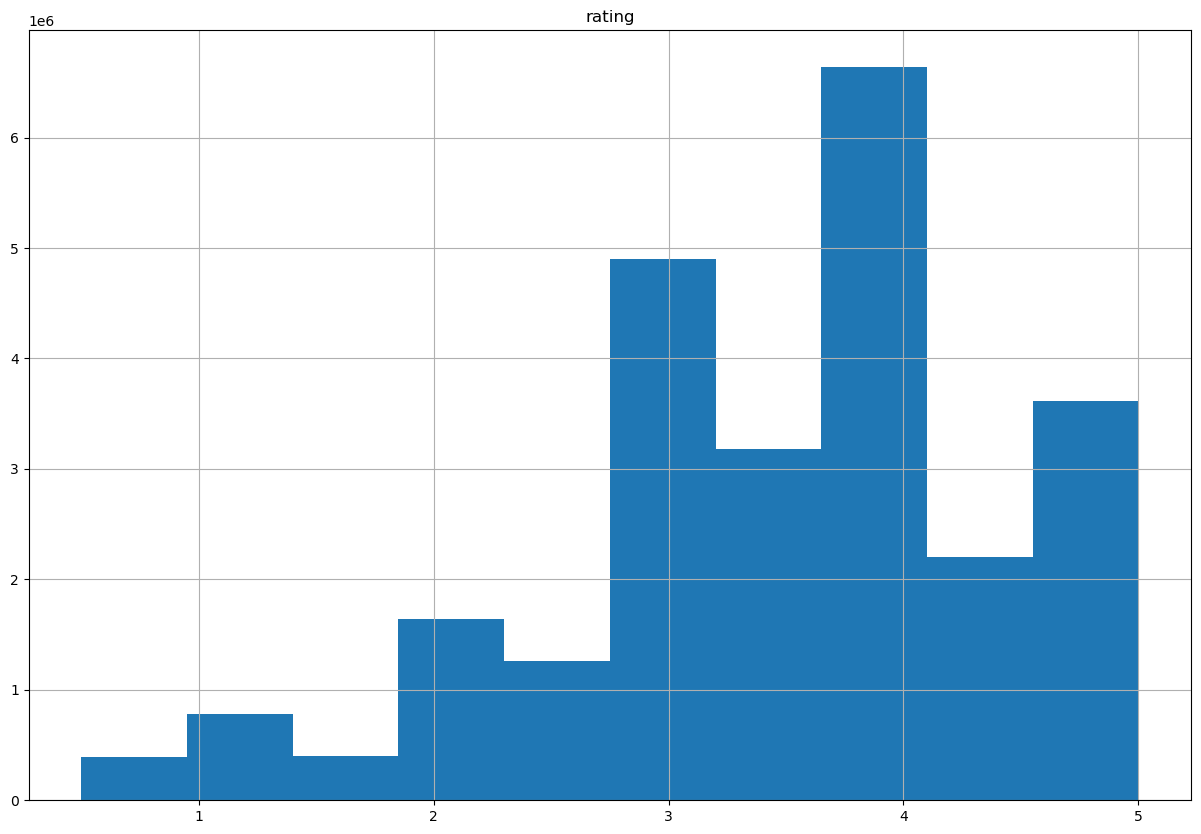

In [21]:
%matplotlib inline
ratings.hist(column = 'rating', figsize = (15,10))

<AxesSubplot:>

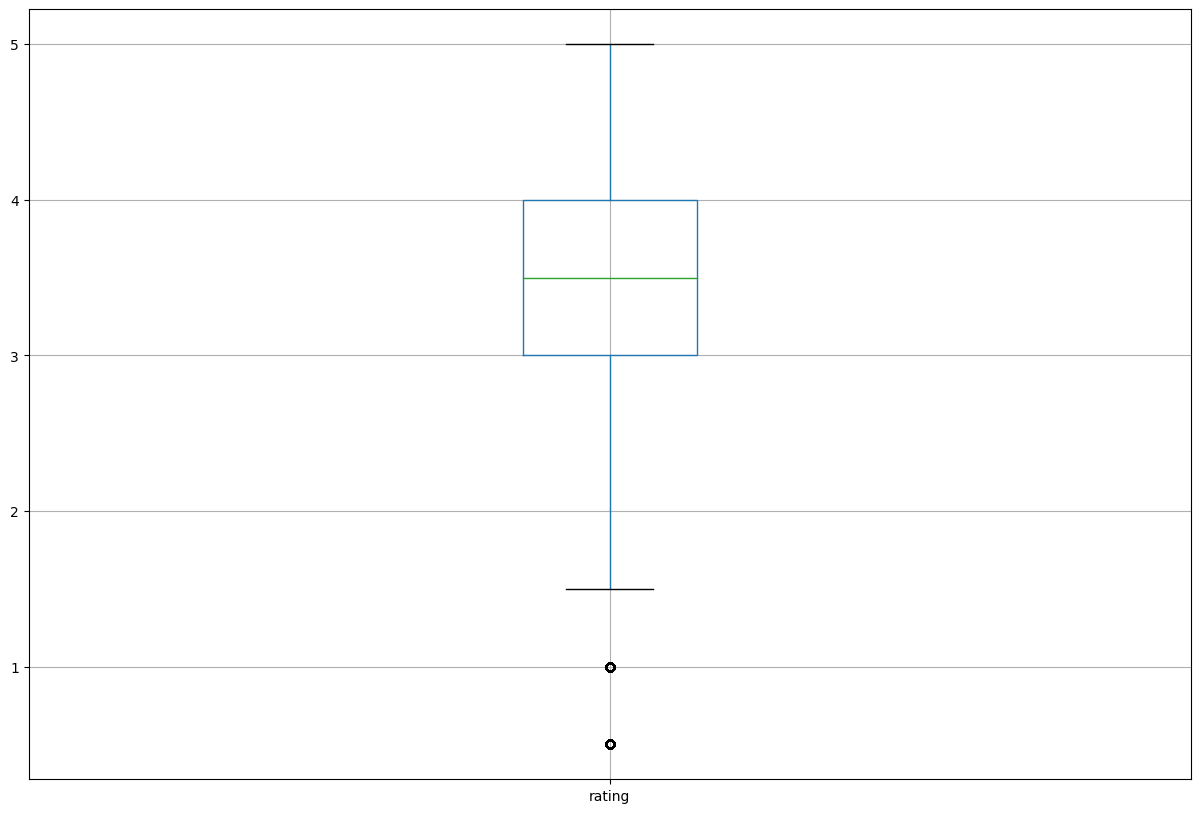

In [22]:
ratings.boxplot(column = 'rating', figsize = (15,10))

In [23]:
ratings.rating.describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [24]:
std_ratings= ratings[['Year','rating']].groupby('Year').std().sort_values(by='rating')

In [25]:
std_ratings.iloc[len(std_ratings)-1]

rating    1.154701
Name: 1995, dtype: float64

In [26]:
int(std_ratings.rating.idxmax())

1995

In [27]:
def find_year_with_max_std(ratings):
    """Function to find the year with the larger standard deviation in rating"""
    ### BEGIN SOLUTION
    std_ratings= ratings[['Year','rating']].groupby('Year').std().sort_values(by='rating')
    return int(std_ratings.rating.idxmax())
    ### END SOLUTION

In [28]:
assert find_year_with_max_std(ratings) == 1995, "Wrong year identified, try again!"

## Advanced Exercise 1: Identify Popular Movies

*In the rest of the notebook, we will introduce new concepts not covered in class, this will challenge you to read additional pandas documentation.*

First we would like only to consider movies that have a significant number of ratings. This task is complicated by the fact that movies and ratings are in 2 different DataFrames and we want to filter the `movies` DataFrame based on a statistics on the `ratings` DataFrame.

First let's compute the number of ratings per movie:

In [29]:
number_of_ratings = ratings.movieId.value_counts()

In [30]:
number_of_ratings.head(10300)

356       81491
318       81482
296       79672
593       74127
2571      72674
          ...  
8118        100
93578       100
5396        100
121171      100
180555      100
Name: movieId, Length: 10300, dtype: int64

Now we want to filter this pandas Series object and keep only the rows where the count is larger or equal to 100.
We don't want to pollute our analysis with movies with a tiny number of reviews:

In [31]:
number_of_ratings_of_popular_movies = None
### BEGIN SOLUTION
number_of_ratings_of_popular_movies = number_of_ratings[number_of_ratings >= 100]
number_of_ratings_of_popular_movies.index.sort_values()
### END SOLUTION

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            202103, 202393, 202429, 202439, 203222, 203519, 204352, 204542,
            204698, 205383],
           dtype='int64', length=10326)

In [32]:
assert len(number_of_ratings_of_popular_movies) == 10326, "Try again, check that movies with 100 ratings are accepted"

Finally we want to use the `reindex` function to change the index of movies, this will create a new DataFrame with a new index that contains the movieId of only the most popular movies.

The value of all the rows of `movies` that have the same movieId will be copied over to the new `popular_movies` dataset, the rest will be discarded.

In [33]:
all_popular_movies1 =  movies[movies.movieId.isin(number_of_ratings_of_popular_movies.index)]
all_popular_movies1

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
60529,203519,Fast & Furious Presents: Hobbs & Shaw (2019),Action,2019
60869,204352,Ad Astra (2019),Adventure|Drama|Mystery|Sci-Fi|Thriller,2019
60937,204542,It: Chapter Two (2019),Horror,2019
61005,204698,Joker (2019),Crime|Drama|Thriller,2019


In [34]:
prueba1 = movies.reindex(all_popular_movies1.movieId.index)
prueba1

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
60529,203519,Fast & Furious Presents: Hobbs & Shaw (2019),Action,2019
60869,204352,Ad Astra (2019),Adventure|Drama|Mystery|Sci-Fi|Thriller,2019
60937,204542,It: Chapter Two (2019),Horror,2019
61005,204698,Joker (2019),Crime|Drama|Thriller,2019


In [35]:
all_popular_movies = movies.reindex(number_of_ratings_of_popular_movies.index)
### Note: This will not format correctly without having run code from above
###       So if this looks odd, rerun the notebook up until here and run again
all_popular_movies.head(10)

,movieId,title,genres,year
356,361.0,It Could Happen to You (1994),Comedy|Drama|Romance,1994.0
318,322.0,Swimming with Sharks (1995),Comedy|Drama,1995.0
296,300.0,Quiz Show (1994),Drama,1994.0
593,601.0,"Wooden Man's Bride, The (Yan shen) (1994)",Drama,1994.0
2571,2663.0,It Came from Beneath the Sea (1955),Sci-Fi,1955.0
260,263.0,Ladybird Ladybird (1994),Drama,1994.0
480,485.0,Last Action Hero (1993),Action|Adventure|Comedy|Fantasy,1993.0
527,532.0,Serial Mom (1994),Comedy|Crime|Horror,1994.0
110,112.0,Rumble in the Bronx (Hont faan kui) (1995),Action|Adventure|Comedy|Crime,1995.0
2959,3052.0,Dogma (1999),Adventure|Comedy|Fantasy,1999.0


## Advanced Exercise 2: Data Cleaning

Everytime we perform a reindexing operation, `pandas` will create a row for every value of the new index, even if it doesn't exist in the original data structure, and it will mark those data as missing with `NaN` (Not A Number).

Always check if reindexing generated invalid data:

In [36]:
all_popular_movies.isnull().sum()

movieId    2672
title      2672
genres     2672
year       2672
dtype: int64

In the exercise above, we indexed the dataset with a list of matching values. Because of this our dataset does not have any `NaN`'s. This next exercise will be an example of what to do if this did happen! 

Go ahead and make a copy of the "number_of_ratings_of_popular_movies.index" from above and call it "fake_ratings_popular_movies_indices".

In [37]:
fake_ratings_popular_movies_indices = None
### BEGIN SOLUTION
fake_ratings_popular_movies_indices = number_of_ratings_of_popular_movies.index.copy()
###END SOLUTION

Now if we try to modify these fake ratings we're going to run into a problem!! 

In [38]:
fake_ratings_popular_movies_indices[0] = 2 #### The error is expected

TypeError: Index does not support mutable operations

Now we can see that certain sets in pandas are **Immutable**. This just means we can't make any changes to it, so we'll instead do things the wrong way for the rest of this exercise. (Just advanced exercise 2)

In [39]:
### This is wrong code, just used for this example!
fake_ratings_popular_movies_indices = number_of_ratings_of_popular_movies
fake_popular_movies_ds = movies.reindex(fake_ratings_popular_movies_indices)
fake_popular_movies_ds.head()

,movieId,title,genres,year
movieId,,,,
81491,NaN,NaN,NaN,NaN
81482,NaN,NaN,NaN,NaN
79672,NaN,NaN,NaN,NaN
74127,NaN,NaN,NaN,NaN
72674,NaN,NaN,NaN,NaN


In the next cell we want to drop the invalid data, look for a `pandas` function that performs that operation (it starts with "drop"!).

In [40]:
popular_fake_movies = None
### BEGIN SOLUTION
popular_fake_movies = fake_popular_movies_ds.dropna()
popular_fake_movies
### END SOLUTION

,movieId,title,genres,year
movieId,,,,
60411,203244.0,Shaft (2019),Action|Crime,2019.0
59184,200300.0,Triple Threat (2019),Action|Thriller,2019.0
58773,199319.0,Out of Blue (2019),Crime|Drama,2019.0
57379,196239.0,The American Meme (2018),Documentary,2018.0
57361,196199.0,Wolfhound of the Grey Dog Clan (2006),Fantasy,2006.0
...,...,...,...,...
100,102.0,Mr. Wrong (1996),Comedy,1996.0
100,102.0,Mr. Wrong (1996),Comedy,1996.0
100,102.0,Mr. Wrong (1996),Comedy,1996.0


In [41]:
assert len(popular_fake_movies) == 9435, "Try again, check the documentation of the function you used"

AssertionError: Try again, check the documentation of the function you used

## Advanced Exercise 3: Filter by Genre

Okay now we're back to our real data! Let's implement a general function that filters movies by genres:

In [42]:
def filter_by_genre(input_movies, genre):
    """Return only movies of a specific genre"""
    ### BEGIN SOLUTION
    return input_movies[input_movies.genres.str.contains(genre)]
    ### END SOLUTION

Then let's apply it to the `popular_movies` dataset to retain only the "Fantasy" movies:

In [43]:
fantasy_movies = filter_by_genre(all_popular_movies1, "Fantasy")
fantasy_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,1995
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy,1995
59,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,1995
...,...,...,...,...
57371,196223,Hellboy (2019),Action|Adventure|Fantasy,2019
57805,197199,Isn't It Romantic (2019),Comedy|Fantasy|Romance,2019
59169,200256,Dumbo (2019),Adventure|Children|Fantasy,2019
59296,200540,Aladdin (2019),Adventure|Fantasy|Romance,2019


In [44]:
assert len(fantasy_movies) == 742, """Try again, Make sure you are filtering the popular movies"""

## Advanced Exercise 4: Join Movies and Ratings

Let's create a single `DataFrame` that contains both titles and mean ratings of the popular fantasy movies.

Titles are only available in the `movies` `DataFrame`, while ratings in the `ratings` `DataFrame`, we would like to create a single DataFrame that includes Title.

Create the `mean_ratings` variable by computing the mean rating for each movie:

In [48]:
mean_ratings = None
### BEGIN SOLUTION
# Mergear tabla de ratings entre ellas
mean_ratings1 = ratings[['movieId','rating']].groupby('movieId').mean().reset_index()
mean_ratings1.rename({'rating': 'mean_rating'}, axis='columns', inplace = True)

mean_ratings2 = ratings[['movieId','rating']].groupby('movieId').count()
mean_ratings1.rename({'rating': 'count'}, axis='columns', inplace = True)

mean_ratings = mean_ratings1.merge(mean_ratings2, on='movieId',how='inner')

# Mergear la tabla resultante con la de fantasy movies
fantasy_movies_with_ratings = fantasy_movies.merge(mean_ratings, on='movieId',how='inner')
fantasy_movies_with_ratings = fantasy_movies_with_ratings.set_index(fantasy_movies_with_ratings.movieId)
### END SOLUTION

In this case we don't even need to use a join operation, we can just create a new column in the `fantasy_movies` DataFrame. This will automatically match the index of `mean_ratings` with the index of `fantasy_movies` and attach to each movie its rating. Ratings for movies that are not in the `fantasy_movies` DataFrame are discarded.

The recommended way of creating columns in the recent versions of `pandas` is through the `assign` function, read its documentation!

In [ ]:
fantasy_movies.assign?

In [ ]:
fantasy_movies_with_ratings = fantasy_movies.assign(rating = mean_ratings)

In [ ]:
fantasy_movies_with_ratings.head()

In [49]:
assert fantasy_movies_with_ratings.loc[7164].title.startswith("Peter"), "Try again, missing or wrong title"

In [50]:
assert abs(fantasy_movies_with_ratings.loc[7164].mean_rating - 3.39) < 0.01 , "Try again, missing or wrong rating"

## Advanced Exercise 5: Find the Highest Rated Fantasy Movie

Again we need to find the index where a column is max, in this case rating:

In [75]:
index_of_max_rating = None
### BEGIN SOLUTION
index_of_max_rating = fantasy_movies_with_ratings.mean_rating.idxmax()
index_of_max_rating
### END SOLUTION

5618

In [76]:
highest_rated_fantasy_movie = fantasy_movies_with_ratings.loc[index_of_max_rating]

In [77]:
assert highest_rated_fantasy_movie.title.startswith("Spirited"), "Try again"